In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Advertising.csv")
df = df.iloc[:, 1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:>

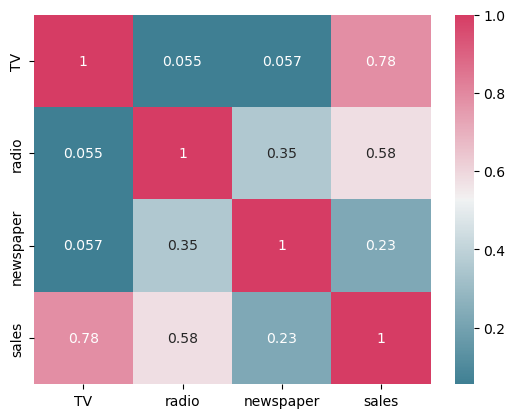

In [7]:
#plot correlation matrix

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels = corr.columns, 
            annot=True, cmap = sns.diverging_palette(220, 2, as_cmap=True))

#high corr between TV and sales, med corr between radio and sales

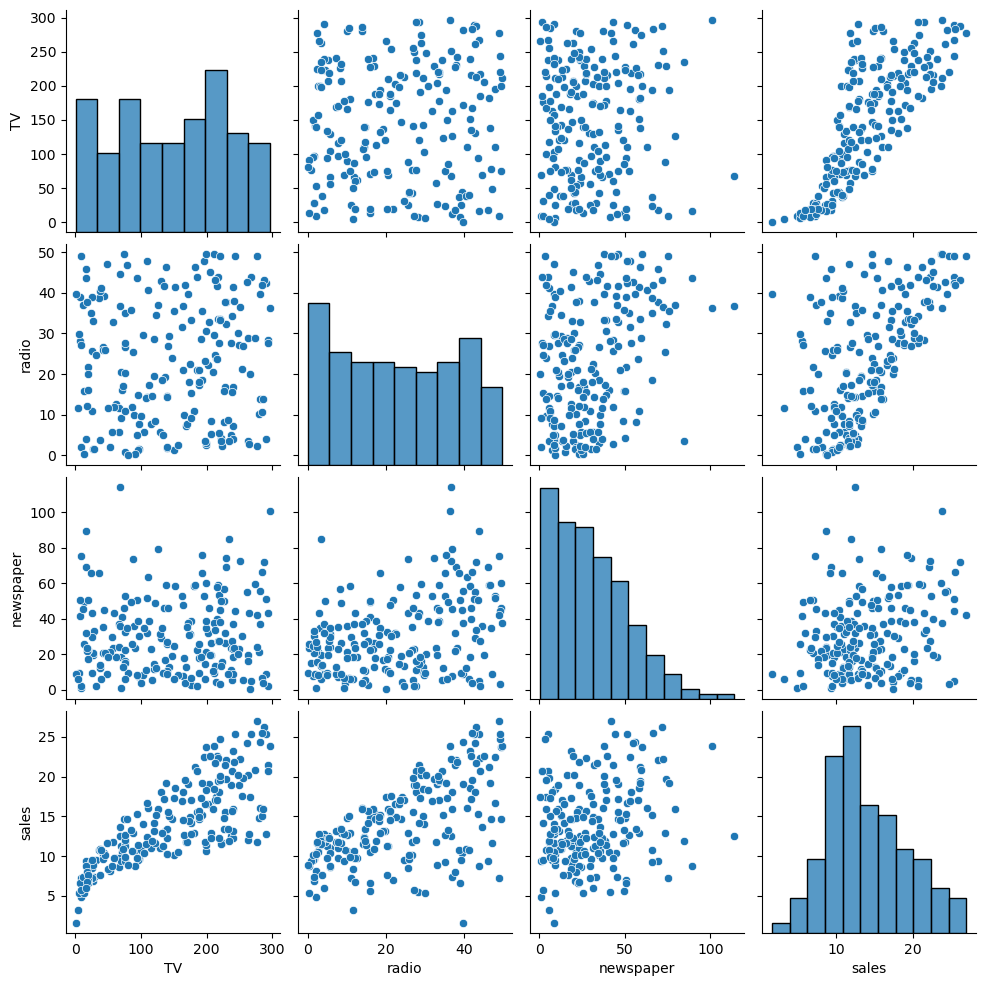

In [8]:
#plot pairplot

sns.pairplot(df)

<AxesSubplot:>

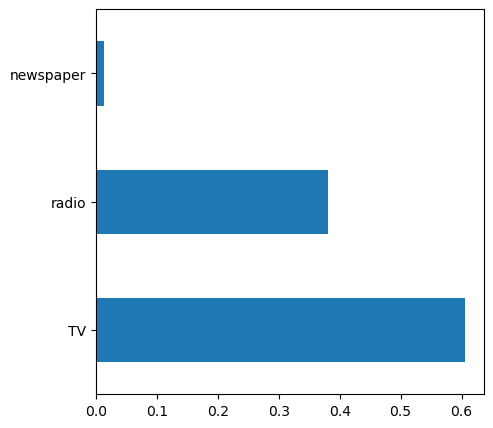

In [17]:
#Feature importance
# use a tree-based emsemble model for feature importance

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh', figsize=(5,5))

In [18]:
#from above, the most important feature for prediction of sales are TV and radio

# Build MMM using OLS (ordinary least square) regression model

import statsmodels.formula.api as sm
model = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        19:04:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

#### How to interprete the above:
1. The R-squared value is almost 90%, representing a resonable model fit
2. The Adjusted R.squared value is 0.896 or almost 90%, meaning the model fails to predict correctly about 10% of the sales
3. The Prob(F-statistic) is the p-value for the hypothesis that there are no good predictors of sales in the dataset.
    since this value is super close to 0 (1.58e-96) we reject the null hypothesis and determine that there are some good
    predictors
4. look at P>|t| to get p-value for each individual input feature. for newspaper the p-value is super high so we can determine it is not a good predictor

In [19]:
#plot prediction vs actual sales
from matplotlib.pyplot import figure

y_pred = model.predict()
labels = df['sales']

df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()

,Actual,Predicted
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672


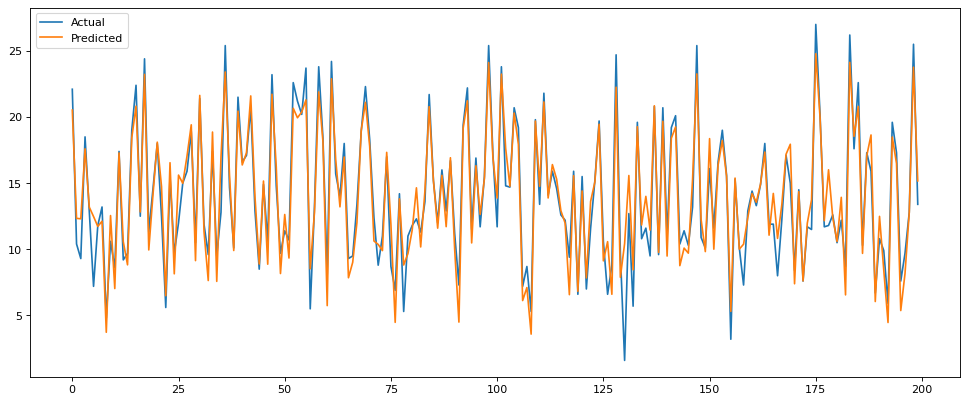

In [20]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']

plt.plot(y1, label='Actual')
plt.plot(y2, label='Predicted')
plt.legend()
plt.show()